In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [37]:
df=pd.read_csv('/content/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height)')

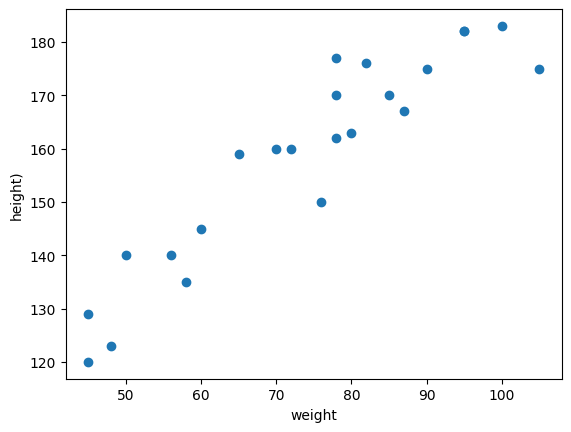

In [38]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height)")

In [39]:
#correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


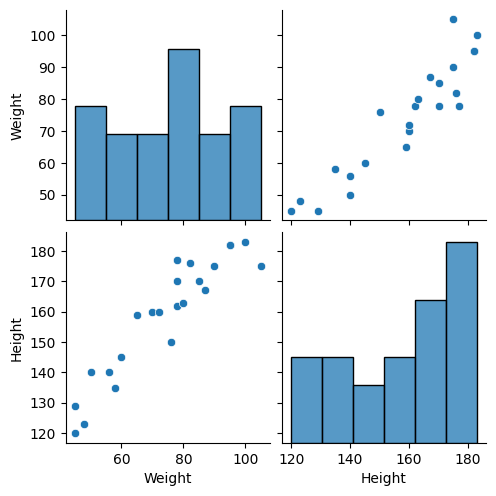

In [41]:
sns.pairplot(df)

In [42]:
#ind & dep
X=df[['Weight']]
y=df[['Height']]

In [43]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
#standardision
from sklearn .preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(X_test)


In [45]:
X_train

array([[ 1.60377199],
       [ 0.2785895 ],
       [-1.52847753],
       [ 1.30259415],
       [-1.70918423],
       [-0.80565072],
       [-0.20329504],
       [ 0.15811836],
       [-1.40800639],
       [-1.04659299],
       [-0.08282391],
       [ 1.00141631],
       [ 0.51953177],
       [ 0.70023847],
       [ 0.82070961],
       [ 0.39906064]])

In [46]:
#simple linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
print(lr.coef_)
print(lr.intercept_)

[[17.03207732]]
[157.8125]


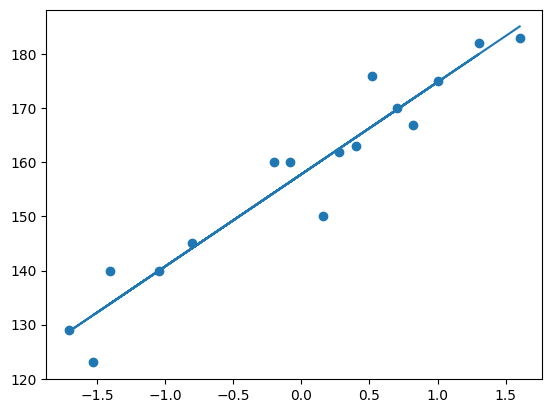

In [64]:
#best fitline
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))

In [66]:
y_pred=lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)

1716536.482684556
1273.0708595528192


In [68]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

-3614.469723673626


In [70]:
1-(1-score)*(len(y_test)/(len(y_test)-X_test.shape[-1]-1))

-5060.657613143077

In [74]:
#ols linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [76]:
prediction=model.predict(X_train)
print(prediction)

[ 27.31556848   4.74495791 -26.03314743  22.18588426 -29.11095796
 -13.7219053   -3.46253685   2.69308422 -23.98127374 -17.82565267
  -1.41066316  17.05620004   8.84870528  11.92651582  13.97838951
   6.79683159]


In [77]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.054
Method:                 Least Squares   F-statistic:                             0.1745
Date:                Thu, 13 Jun 2024   Prob (F-statistic):                       0.682
Time:                        17:04:25   Log-Likelihood:                         -103.69
No. Observations:                  16   AIC:                                      209.4
Df Residuals:                      15   BIC:                                      210.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [82]:
lr.predict(scaler.transform([[75]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[157.938584]])